## Mushroom dataset is used for binary classification tasks for comparing Accuracy of Random Forest and Ada Boost.

Importing Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
df = pd.read_csv("/content/mushrooms.csv")

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.shape

(8124, 23)

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df.drop_duplicates()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.dtypes

,0
class,object
cap-shape,object
cap-surface,object
cap-color,object
bruises,object
odor,object
gill-attachment,object
gill-spacing,object
gill-size,object
gill-color,object


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables into numeric labels (since all features are categorical)
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Show the transformed data
print(df.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

In [ ]:
X = df.drop('class', axis=1)
y= df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Random Forest Implementaion**

In [ ]:
model = RandomForestClassifier()
model

RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_predict = model.predict(X_test)

In [47]:
RF_Accuracy = accuracy_score(y_test,y_predict)
Classification_report = classification_report(y_test,y_predict)
Confution_Matrix = confusion_matrix(y_test,y_predict)

In [48]:
print("Acuuracy of Random Forest:",RF_Accuracy)
print("\nClassification Report\n:",Classification_report)
print("\nConfusion Matrix\n:",Confution_Matrix)

Acuuracy of Random Forest: 1.0

Classification Report
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix
: [[1257    0]
 [   0 1181]]


**AdaBoost Implementation**

In [ ]:
adaboost =  AdaBoostClassifier()
adaboost

AdaBoostClassifier()

In [ ]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pre = adaboost.predict(X_test)

In [50]:
Adb_Accuracy = accuracy_score(y_test,y_pre)
Classification_report = classification_report(y_test,y_pre)
Confution_Matrix = confusion_matrix(y_test,y_pre)

In [51]:
print("Acuuracy of Adaboost:",Adb_Accuracy)
print("\nClassification Report\n:",Classification_report)
print("\nConfusion Matrix\n:",Confution_Matrix)

Acuuracy of Adaboost: 0.9917965545529123

Classification Report
:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438


Confusion Matrix
: [[1257    0]
 [  20 1161]]


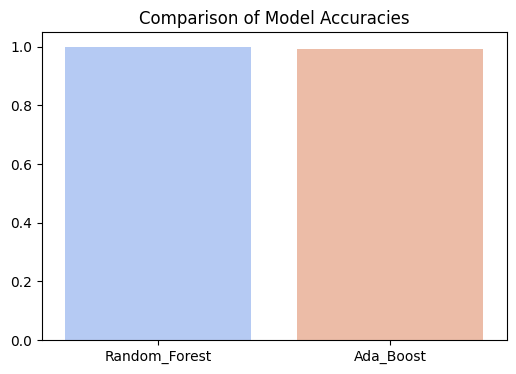

In [72]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Random_Forest','Ada_Boost'],y = [RF_Accuracy,Adb_Accuracy],palette='coolwarm')
plt.title('Comparison of Model Accuracies')
plt.show()

**Insights**
* Both Random Forest and AdaBoost have nearly identical accuracy (~99.18%), indicating excellent model performance.

* Random Forest may be slightly more stable due to its ensemble of many trees, but AdaBoost achieves similar accuracy using weighted weak learners.

* Such high accuracy suggests that the dataset is well-classified, with minimal misclassifications (as seen in the confusion matrix).

* When two models perform equally well, you can choose based on training time, interpretability, or tolerance to overfitting —

   1. Random Forest → better for large datasets and robustness

   2. AdaBoost → better if interpretability or speed is desired.

In [65]:
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                     Feature  Importance
4                       odor    0.185328
7                  gill-size    0.133306
19         spore-print-color    0.117616
8                 gill-color    0.102030
10                stalk-root    0.060291
18                 ring-type    0.051290
20                population    0.051208
11  stalk-surface-above-ring    0.049532
3                    bruises    0.049378
12  stalk-surface-below-ring    0.039582
6               gill-spacing    0.033258
21                   habitat    0.032521
9                stalk-shape    0.020179
13    stalk-color-above-ring    0.020016
17               ring-number    0.014610
2                  cap-color    0.014314
14    stalk-color-below-ring    0.008691
1                cap-surface    0.007846
0                  cap-shape    0.004974
5            gill-attachment    0.002181
16                veil-color    0.001850
15                 veil-type    0.000000


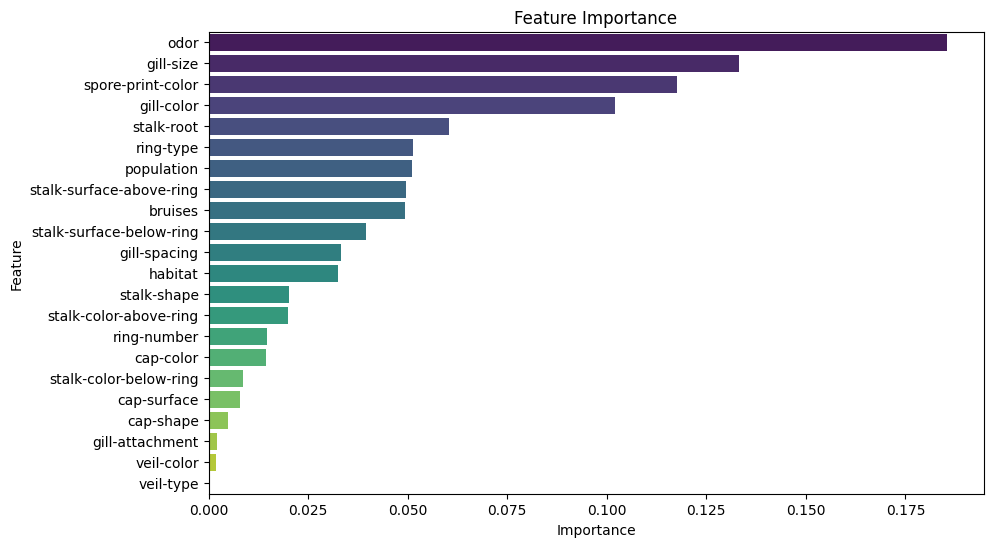

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df,palette='viridis')
plt.title('Feature Importance')
plt.show()